In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from models.model_fpgan import FPGANSynthesizer
from models.model_ctgan import CTGANSynthesizer
from models.model_dpctgan import DPCTGANSynthesizer

import ctgan
from sklearn.model_selection import train_test_split
from utils.privacy import normalized_avg_dist
from utils.fidelity import get_predictions, eval_fidelity, get_accuracy, get_roc_auc

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("D:/Datasets/bankruptcy/data.csv")
data = data.drop(columns=[' Net Income Flag', ' Liability-Assets Flag'])
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.067250,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [4]:
data.shape

(6819, 94)

In [5]:
#normalized_data=(data-data.mean())/data.std()
data=(data-data.min())/(data.max()-data.min())

In [6]:
target = 'Bankrupt?'

In [7]:
X = data.drop(columns=[target])
y = data[target]

In [10]:
#model_ctgan = CTGANSynthesizer(epochs=25, verbose=True)
#model_ctgan = DPCTGANSynthesizer(verbose=True)
model_ctgan = FPGANSynthesizer(epochs=25, verbose=True)
#original_losses, tranformed_privacies, losses = model_ctgan.fit(data)
model_ctgan.fit(data)

Epoch 1, Loss G:  0.0724,Loss D: -4.4523
Epoch 2, Loss G: -0.3067,Loss D: -1.7483
Epoch 3, Loss G: -0.3853,Loss D: -0.6696
Epoch 4, Loss G: -0.4668,Loss D:  0.3117
Epoch 5, Loss G: -0.2733,Loss D: -1.2081
Epoch 6, Loss G: -0.2201,Loss D:  0.3365
Epoch 7, Loss G:  0.0645,Loss D: -0.4422
Epoch 8, Loss G:  0.1672,Loss D: -1.4494
Epoch 9, Loss G: -0.0822,Loss D: -1.3262
Epoch 10, Loss G:  0.0998,Loss D: -3.0196
Epoch 11, Loss G: -0.1530,Loss D: -1.3848
Epoch 12, Loss G: -0.2257,Loss D: -0.5083
Epoch 13, Loss G: -0.2931,Loss D: -0.0672
Epoch 14, Loss G: -0.2422,Loss D:  0.2233
Epoch 15, Loss G: -0.1743,Loss D:  0.0070
Epoch 16, Loss G: -0.1314,Loss D:  0.2135
Epoch 17, Loss G: -0.1600,Loss D: -0.0952
Epoch 18, Loss G: -0.0110,Loss D: -0.2330
Epoch 19, Loss G:  0.0065,Loss D:  0.8123
Epoch 20, Loss G:  0.0862,Loss D: -0.3994
Epoch 21, Loss G: -0.0048,Loss D:  0.4206
Epoch 22, Loss G:  0.1367,Loss D: -0.5725
Epoch 23, Loss G:  0.1662,Loss D: -0.4860
Epoch 24, Loss G:  0.1858,Loss D: -0.5820
E

([array(0.03213535, dtype=float32),
  array(0.05322077, dtype=float32),
  array(0.087272, dtype=float32),
  array(0.12566976, dtype=float32),
  array(0.16465837, dtype=float32),
  array(0.21712531, dtype=float32),
  array(0.2707145, dtype=float32),
  array(0.3220644, dtype=float32),
  array(0.37504646, dtype=float32),
  array(0.41222748, dtype=float32),
  array(0.45431247, dtype=float32),
  array(0.48531908, dtype=float32),
  array(0.5537415, dtype=float32),
  array(0.62065953, dtype=float32),
  array(0.592095, dtype=float32),
  array(0.5859323, dtype=float32),
  array(0.5318685, dtype=float32),
  array(0.4852114, dtype=float32),
  array(0.4257324, dtype=float32),
  array(0.23533005, dtype=float32),
  array(0.24608192, dtype=float32),
  array(0.12402615, dtype=float32),
  array(0.08893079, dtype=float32),
  array(0.00444651, dtype=float32),
  array(-0.09067437, dtype=float32),
  array(-0.25200495, dtype=float32),
  array(-0.28088254, dtype=float32),
  array(-0.37952468, dtype=float32),

In [9]:
from utils.utils import save_models
save_models(model_ctgan, 'fpgan25', 'bankruptcy')

In [33]:
from utils.utils import load_models
model_ctgan = load_models('dpctgan3', 'bankruptcy')

In [34]:
samples = model_ctgan.sample(len(data))  # Synthetic copy
samples.dropna(how='any', inplace=True)

X_syn = samples.drop(columns=[target])
y_syn = samples[target]
y_syn = y_syn.round(0)
y_syn = y_syn.astype(int)

## Privacy

In [35]:
samples = samples.apply(pd.to_numeric) # convert all columns of DataFrame
data = data.apply(pd.to_numeric) # convert all columns of DataFrame
samples = samples[:2000]
data = data[:2000]

In [36]:
normalized_avg_distance = normalized_avg_dist(samples, data)
print(normalized_avg_distance)

[0.1046061]


## Fidelity

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn, y_syn, test_size=0.3, random_state=42, stratify=y_syn)

rr_pred = []
fr_pred = []
ff_pred = []
rf_pred = []

rr_pred = get_predictions(X_train, y_train, X_test, y_test)
fr_pred = get_predictions(X_syn_train, y_syn_train, X_test, y_test)

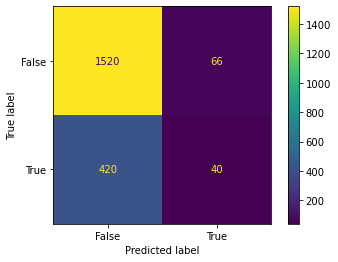

In [59]:
from sklearn import metrics
def print_confusion_matrix(rr_pred, fr_pred):
    confusion_matrix = metrics.confusion_matrix(rr_pred, fr_pred)

    cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display1.plot()
    plt.show()
    
print_confusion_matrix(rr_pred, fr_pred)

In [60]:
percentage, class1_ratio, class2_ratio = eval_fidelity(rr_pred, fr_pred)

In [61]:
rr_acc = get_accuracy(y_test, rr_pred)
fr_acc = get_accuracy(y_test, fr_pred)
print("Accuracy of real data: ", rr_acc)
print("Accuracy of synthetic data: ", fr_acc)

Accuracy of real data:  0.7956989247311828
Accuracy of synthetic data:  0.9188660801564027


In [62]:
rr_score = get_roc_auc(y_test, rr_pred)
fr_score = get_roc_auc(y_test, fr_pred)
print("ROC AUC of real data: ", rr_score)
print("ROC AUC of synthetic data: ", fr_score)

ROC AUC of real data:  0.782989368355222
ROC AUC of synthetic data:  0.5330479987492183


In [63]:
print(class1_ratio, class2_ratio)

0.7577268195413759 0.07604562737642585


## Final plot

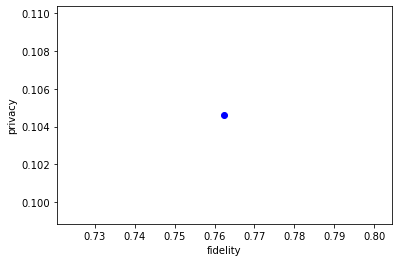

0.7624633431085044 [0.1046061]


In [64]:
plt.scatter(percentage, normalized_avg_distance, c ="blue")
plt.xlabel("fidelity")
plt.ylabel("privacy")
plt.show()
print(percentage, normalized_avg_distance)